# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.columns

Index([u'temperature', u'gender', u'heart_rate'], dtype='object')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Is the distribution of body temperatures normal? 

What we will do is compare the empirical cumulative distribution function of the data to the theoretical cumulative distribution function of a normal distrubution and compare. The normal distribution will be created using the mean and variance from the original dataset.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Create the ECDF for the data
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""    
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)

    return x, y

temp_x, temp_y = ecdf(df['temperature'])


mean = np.mean(df['temperature'])
var = np.var(df['temperature'])
size = len(df['temperature'])

normal_x, normal_y = ecdf(np.random.normal(mean, var, size))



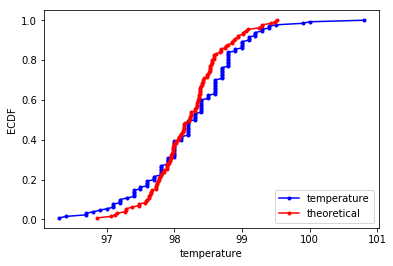

In [4]:
plt.plot(temp_x, temp_y, marker='.', color='blue')
plt.plot(normal_x, normal_y, marker='.', color='red')

plt.xlabel('temperature')
plt.ylabel('ECDF')
plt.legend(('temperature','theoretical'), loc='lower right')

plt.show()

The blue plot in the above graph is the cumulative distribution function of the body temperatures taken from the original data source, and the red is taken from a normal distribution with the same mean and variance as the data source.  As can be seen in the graph, the blue plot approximately follows a normal distribution and hence we can conclude that the distribution of the body temperature is normal.

## Is the sample size large? Are the observations independent? 

In [5]:
print 'size of sample is: ', len(df['temperature'])

size of sample is:  130


The sample size is very small, with only 130 samples in the dataset.  But the observations are independent, as one person's body temperature does not affect another observation.


## Is the true population mean really 98.6 degrees F? 

The setup is we have a datasource of observations, and a theoretical temperature of the population mean.  Since we have one sample available to base our hypothesis testing off of, we use a one-sample testing. Also as our initial testing, we will use the t-test because we do not know the population standard deviation.  Usually, if the dataset has less than 30 observations, or has no known population standard deviation, we would use the t-test. <br>

How we will test if the true population mean is 98.6 is as follows <br>
1) our null hypothesis is that there is no significant difference between the population mean and the observed mean.  
2) we will bootstrap samples from the dataframe and create a list of means.
3) using this list of means, we will check if the true population mean is probable.

In [17]:
pop_mean = 98.6
obs_mean = np.mean(df['temperature'])


In [10]:
#bootstrap the dataframe and get the means
num_trials = 10000
test_means = np.empty(num_trials)
for i in range(num_trials):
    test_means[i] = np.mean(np.random.choice(df['temperature'], len(df['temperature'])))
    

In [13]:
from scipy import stats

stats.ttest_1samp(test_means, pop_mean)

Ttest_1sampResult(statistic=-550.1574806846229, pvalue=0.0)

In [11]:
#compute the z-score for the difference
def get_z(data_array, sample):
    return (sample - np.mean(data_array))/float(np.std(data_array))

print get_z(test_means, pop_mean)

5.50184990622


The T-statistics for this test turned out to be a value very large, which is strong evidence to reject the null hypothesis, and the same can be seen from the outcome of the z-score.  Hence, we can conclude from these that the dataframe does not represent the population mean well

## Draw a small sample of size 10 from the data and repeat both tests.

    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the tt and zz statistic? 

In [18]:
from scipy import stats

# create the randomly taken samples from the shifted array and take the means.
trials = 10
test_means = np.empty(trials)

for i in range(trials):
    test_means[i] = np.mean(np.random.choice(df['temperature'], len(df['temperature'])))
test_means

array([ 98.22307692,  98.18      ,  98.33692308,  98.26538462,
        98.28769231,  98.29307692,  98.20307692,  98.29153846,
        98.16153846,  98.13384615])

In [19]:
print get_z(test_means, pop_mean), stats.ttest_1samp(test_means, pop_mean)

5.70107987193 Ttest_1sampResult(statistic=-17.103239615795591, pvalue=3.5918273180501691e-08)


The z-score increased, which shows that there is more evidence against the null hypotheis, whereas the t-statistics decreased, meaning there is less evidence against the null hypothesis. Even though there is still strong evidence against the null, it did shift a bit.

## At what temperature should we consider someone's temperature to be "abnormal"?

    Start by computing the margin of error and confidence interval. 





In [23]:
# we will bootstrap from the data many times, than figure out a confidence interval of 95%.
# create the randomly taken samples from the shifted array and take the means.
trials = 1000
test_means = np.empty(trials)

for i in range(trials):
    test_means[i] = np.mean(np.random.choice(df['temperature'], len(df['temperature'])))

np.percentile(test_means, 97.5)

98.377749999999992

According to the dataset we have, if the temperature is above 98.38 we can consider the temperature to be 'abnormal'

## Is there a significant difference between males and females in normal temperature?

    What test did you use and why?
    Write a story with your conclusion in the context of the original problem. 
    
We will consider the same bootstrap methodology to create a bunch of means of male/female temperatures.  
The null hypothesis will be the difference of the means is 0, which implies there is no significant difference between the average body temperatures of male and females

In [27]:
m_temps = df[df['gender']=='M']['temperature']
f_temps = df[df['gender']=='F']['temperature']

In [36]:
np.random.choice(m_temps)

65

In [44]:
n_trials = 1000
m_temp_means, f_temp_means = np.empty(n_trials), np.empty(n_trials)

for i in range(n_trials):
    m_temp_means[i] = np.mean(np.random.choice(m_temps, len(m_temps)))
    f_temp_means[i] = np.mean(np.random.choice(f_temps,len(f_temps)))

In [45]:
#subtract the two means and see if 0 is included in the confidence interval
total_mean = m_temp_means - f_temp_means
print np.percentile(total_mean, [5, 95])


[-0.50923077 -0.06769231]


Since 0 is not included in the confidence interval, we can reject the null hypothesis at the 95% confidence interval.  